Alexander Sandoval

Phone: 929 595 8816
Email: asandov003@citymail.cuny.edu

LinkedIn:
https://www.linkedin.com/in/alexander-sandoval-69bbb4249/

Import libraries

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import requests
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import plotly.express as px

**Part 1: Query NYC Open Data API**

In [30]:
# Set query limit and compute 30-day window
def noise_complaints(start_date, limit):
    """
    Retrieves NYC 311 Noise Complaints from the last 30 days.
    Each dictionary contains: complaint_type is Noise, borough, created_date, descriptor
    """

    url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"

    params = {
        "$limit": limit,
        "$order": "created_date DESC",
        "$where": f"complaint_type='Noise' AND created_date >= '{start_date}'",
        "$select": "complaint_type,borough,created_date,descriptor"
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return []


Showing the Dataframe related to the function to fetch the information

In [34]:
#Query limit
limit = 1000
#Data from the last 30 days
start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%dT%H:%M:%S")

# Get list of complaints
complaints_list = noise_complaints(start_date, limit)

# Convert to DataFrame
df = pd.DataFrame(complaints_list)

print (df.head())


  complaint_type    borough             created_date  \
0          Noise   BROOKLYN  2025-05-03T23:59:00.000   
1          Noise      BRONX  2025-05-03T23:53:00.000   
2          Noise  MANHATTAN  2025-05-03T23:47:00.000   
3          Noise  MANHATTAN  2025-05-03T23:20:00.000   
4          Noise  MANHATTAN  2025-05-03T22:47:00.000   

                                         descriptor  
0  Noise: air condition/ventilation equipment (NV1)  
1  Noise: air condition/ventilation equipment (NV1)  
2      Noise: Construction Before/After Hours (NM1)  
3                          Noise, Barking Dog (NR5)  
4                          Noise, Barking Dog (NR5)  


**Part 2: Dataset Exploration**

In [32]:
# Display sample
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   complaint_type  1000 non-null   object
 1   borough         1000 non-null   object
 2   created_date    1000 non-null   object
 3   descriptor      1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
None
  complaint_type    borough             created_date  \
0          Noise   BROOKLYN  2025-05-03T23:59:00.000   
1          Noise      BRONX  2025-05-03T23:53:00.000   
2          Noise  MANHATTAN  2025-05-03T23:47:00.000   
3          Noise  MANHATTAN  2025-05-03T23:20:00.000   
4          Noise  MANHATTAN  2025-05-03T22:47:00.000   

                                         descriptor  
0  Noise: air condition/ventilation equipment (NV1)  
1  Noise: air condition/ventilation equipment (NV1)  
2      Noise: Construction Before/After Hours (NM1)  
3                          Noise

In [42]:
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna(subset=['descriptor', 'borough'])

complaint_type    0
borough           0
created_date      0
descriptor        0
dtype: int64


In [47]:
# Summarize the top 3 noise complaint descriptors
descriptor_counts = df_cleaned['descriptor'].value_counts().head(3)
descriptor_summary = descriptor_counts.reset_index()
descriptor_summary.columns = ['Descriptor', 'Count']

# Total percentage
total = df_cleaned['descriptor'].value_counts().sum()
descriptor_summary['Percentage'] = (descriptor_summary['Count'] / total * 100).round(2)

# Display the summary
print("\nTop 3 Noise Complaint Descriptors:")
print(descriptor_summary)


Top 3 Noise Complaint Descriptors:
                                     Descriptor  Count  Percentage
0  Noise: Construction Before/After Hours (NM1)    380        38.0
1                      Noise, Barking Dog (NR5)    177        17.7
2           Noise: Construction Equipment (NC1)    145        14.5


Based on an analysis of 1,000 recent 311 service request records from the past 30 days, the top three reported causes of noise disruptions are as follows:


*   Construction Before/After Hours is the most frequently reported issue, accounting for 38% of all complaints.
*   Barking Dog ranks second, comprising about 17.7% of the complaints.
*   Construction Equipment follows in third place, representing 14.5% of the total reports.

These findings suggest that a significant portion of noise-related complaints are tied to construction activity, particularly when it occurs outside permitted hours. Additionally, persistent animal noise remains a noteworthy concern in residential areas.

**Part 3: Generate Insights**

In [49]:
# Summarize the noise complaint by Borough
borough_counts = df_cleaned['borough'].value_counts()
borough_summary = borough_counts.reset_index()
borough_summary.columns = ['Borough', 'Count']

# Total percentage
total = df_cleaned['borough'].value_counts().sum()
borough_summary['Percentage'] = (borough_summary['Count'] / total * 100).round(2)

# Display the summary
print("\nBorough Noise Complaint:")
print(borough_summary)


Borough Noise Complaint:
         Borough  Count  Percentage
0       BROOKLYN    341        34.1
1      MANHATTAN    334        33.4
2         QUEENS    178        17.8
3          BRONX     94         9.4
4  STATEN ISLAND     53         5.3


In [55]:
# Generate pivot table
pivot_table = pd.pivot_table(
    df_cleaned,
    columns='borough',
    index='descriptor',
    values='complaint_type',
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='Total'
)

# Display the pivot table
print("Noise Complaint Counts by Borough and Descriptor:")
print(pivot_table)


Noise Complaint Counts by Borough and Descriptor:
borough                                           BRONX  BROOKLYN  MANHATTAN  \
descriptor                                                                     
Noise, Barking Dog (NR5)                             17        57         37   
Noise, Ice Cream Truck (NR4)                          8        13         19   
Noise, Other Animals (NR6)                            0         6          0   
Noise:  lawn care equipment (NCL)                     3         9          4   
Noise: Alarms (NR3)                                   9        27         13   
Noise: Boat(Engine,Music,Etc) (NR10)                  2         1          0   
Noise: Construction Before/After Hours (NM1)         28       118        158   
Noise: Construction Equipment (NC1)                  13        63         47   
Noise: Jack Hammering (NC2)                           3        18         22   
Noise: Manufacturing Noise (NK1)                      0         3     

The leading causes of noise complaints across NYC boroughs align with the citywide top three: Construction Before/After Hours (NM1), Barking Dog (NR5), and Construction Equipment (NC1). Brooklyn and Manhattan report the highest number of complaints, with 341 and 334 cases respectively, out of a total of 1,000 sampled incidents. Mahattan stands out as a borough with constant Before/After Hours noise due to construction.

**Part 4: Build Visualizations**

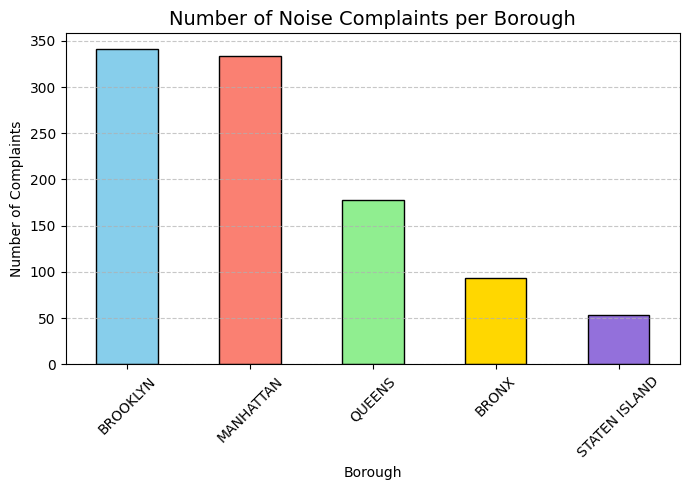

In [176]:
import matplotlib.pyplot as plt

# Count noise complaints by borough
borough_counts = df_cleaned['borough'].value_counts().sort_values(ascending=False)

# Unique color for each bar (borough)
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'mediumpurple']

# Plot bar chart
plt.figure(figsize=(7, 5))
borough_counts.plot(kind='bar', color=colors, edgecolor='black')

# Labels and formatting
plt.title('Number of Noise Complaints per Borough', fontsize=14)
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart displays the number of noise complaints by borough, confirming that Brooklyn and Manhattan had the highest number of complaints over the past 30 days.

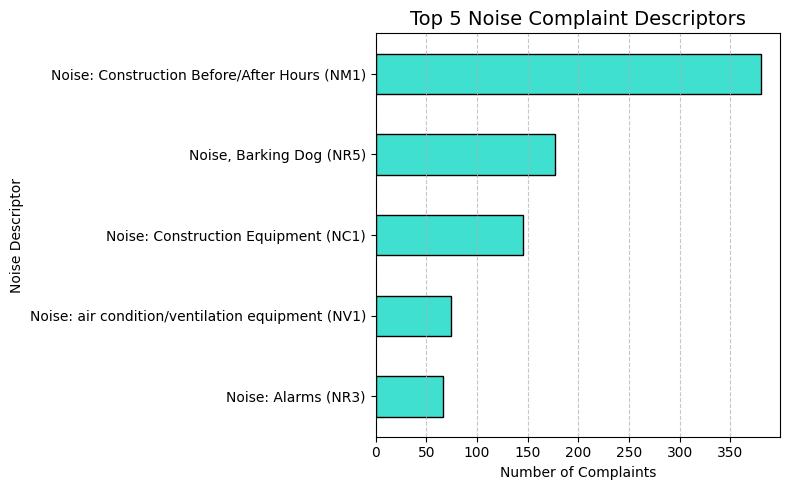

In [78]:
# Count top 5 descriptors
descriptor_counts = df_cleaned['descriptor'].value_counts().head(5)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
descriptor_counts.plot(kind='barh', color='turquoise', edgecolor='black')
plt.title('Top 5 Noise Complaint Descriptors', fontsize=14)
plt.xlabel('Number of Complaints')
plt.ylabel('Noise Descriptor')
plt.gca().invert_yaxis()  # Invert y-axis to show descriptors from most common to least common
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The horizontal bar chart displays the top 5 of noise complaints by Noise description in NYC, confirming that "construction before/after hours" had the highest number of complaints over the past 30 days.

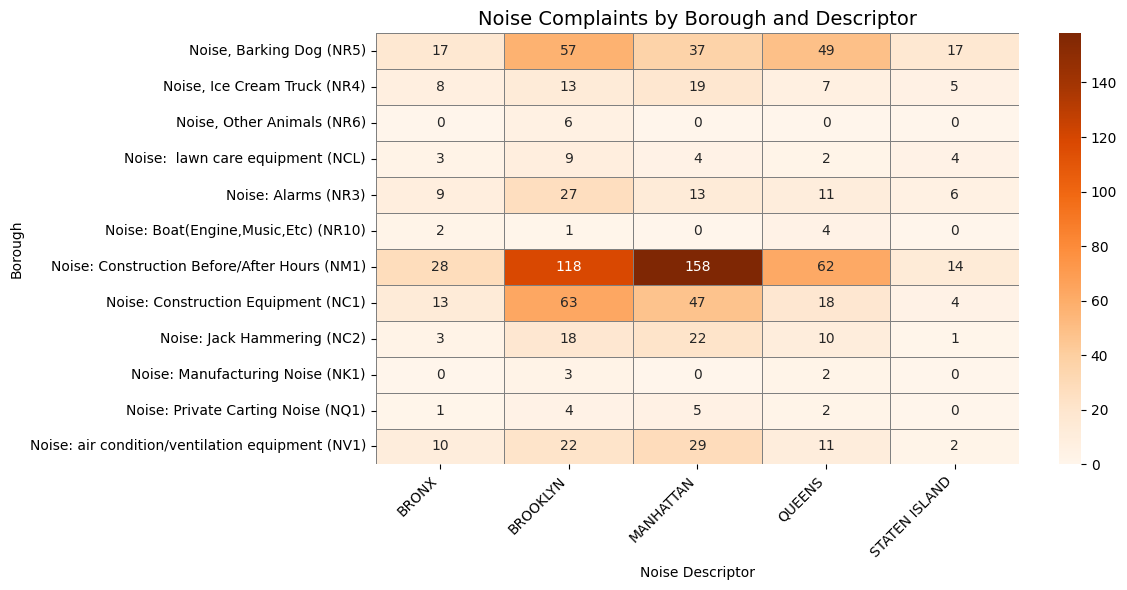

In [90]:
# Generate pivot table
pivot_table = pd.pivot_table(
    df_cleaned,
    columns='borough',
    index='descriptor',
    values='complaint_type',
    aggfunc='count',
    fill_value=0,
    margins=False
)
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='gray')

# Titles and labels
plt.title('Noise Complaints by Borough and Descriptor', fontsize=14)
plt.xlabel('Noise Descriptor')
plt.ylabel('Borough')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The heatmap highlights the number of noise complaints across boroughs by descriptor. Notably, “Construction Before/After Hours” in Manhattan stands out with 158 complaints out of 1,000 total, indicating a major source of disruption. In contrast, descriptors like “Noise: Other Animals” and “Manufacturing Noise” show minimal presence across most boroughs. The color gradient enhances interpretation, with darker shades representing higher complaint counts and lighter shades indicating lower frequencies.


In [158]:
import plotly.express as px

# Clean and group data
df_sunburst = df_cleaned.dropna(subset=['borough', 'descriptor'])
sunburst_data = df_sunburst.groupby(['borough', 'descriptor']).size().reset_index(name='count')


# Create sunburst with descriptor colors
fig = px.sunburst(
    sunburst_data,
    path=['borough', 'descriptor'],
    values='count',
    color='descriptor',
    color_discrete_sequence=px.colors.qualitative.Set3 + px.colors.qualitative.Alphabet,
    title='Noise complaints description per borough',
    width=1000,       # width
    height=700,       # height

)

# Collapse to top level initially
fig.update_traces(maxdepth=2)

# Show labels and percentages
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percent of Parent: %{percentParent:.2%}',
    textinfo='label+percent parent',
    sort=False
)

fig.update_layout(
    showlegend=True,
    legend_title_text='Descriptors',
    legend=dict(
        orientation="v",
        x=2.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    annotations=[
        dict(
            x=0,
            y=0.95,
            xref="paper",
            yref="paper",
            text="Click a borough to expand and view<br>noise complaint types.",
            showarrow=False,
            font=dict(size=12, color="gray"),
            align="center",
            bordercolor="lightgray",
            borderwidth=0,
            bgcolor="white",
        )
    ],
    width=1000,
    height=700,
    )


fig.show()


The sunburst chart visually represents the distribution of noise complaints in New York City, segmented first by borough (inner ring) and then by complaint descriptor (outer ring). Each borough slice shows its relative contribution to the total 1,000 complaints collected in the last 30 days,Upon clicking a borough, the chart dynamically expands to reveal the types of noise complaints reported in that specific area. For example:


*   In Manhattan, “Construction Before/After Hours” is the most frequent complaint, followed by “Barking Dog” and “Construction Equipment”.
*   In Queens, “Barking Dog” appears as the dominant descriptor.


Each outer ring segment reflects the proportion of complaints by type within the borough, allowing users to understand not just how much noise is reported—but what kind of noise dominates in each borough.

I chose this dynamic representation because it depicts hierarchical clarity, showing two levels of data: overall complaints per borough and their detailed breakdown by descriptor, allowing an effective interaction with the user, and a quick visual assessment of which categories dominate.



In [177]:
# Datetime
df_cleaned['created_date'] = pd.to_datetime(df_cleaned['created_date'])
df_cleaned['date'] = df_cleaned['created_date'].dt.date

# Top 3 descriptors with counts per (date, borough)
def top_descriptors_with_counts(group):
    vc = group['descriptor'].value_counts().nlargest(3)
    return [(desc, int(count)) for desc, count in vc.items()]

top_descriptors_dict = df_cleaned.groupby(['date', 'borough'],).apply(top_descriptors_with_counts).to_dict()

# Counting complaints per day/borough
daily_by_borough = df_cleaned.groupby(['date', 'borough']).size().reset_index(name='count')

# Build tooltip text
def format_tooltip(row):
    top3 = top_descriptors_dict.get((row['date'], row['borough']), [])
    tooltip = f"<b>{row['borough']}</b><br>Date: {row['date']}<br>Total: {row['count']}<br>Top 3:<br>"
    for i, (desc, cnt) in enumerate(top3, 1):
        tooltip += f"{i}. {desc} – {cnt}<br>"
    return tooltip

daily_by_borough['hover'] = daily_by_borough.apply(format_tooltip, axis=1)

# Plot with separate tooltips per borough
fig = px.line(
    daily_by_borough,
    x='date',
    y='count',
    color='borough',
    custom_data=['hover'],
    markers=True,
    title='Daily Noise Complaints by Borough with Top 3 Descriptors',
    labels={'date': 'Date', 'count': 'Number of Complaints'}
)

fig.update_traces(
    hovertemplate="%{customdata[0]}<extra></extra>"
)

# Each borough act individually
fig.update_layout(
    hovermode='closest',
    width=1000,
    height=600,
    legend_title='Borough',
)


fig.show()


<ipython-input-177-5dcd18809513>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



This line chart illustrates the daily trend of noise complaints across the five boroughs of New York City during the last 30-day period. Each colored line represents a borough, showing how complaint volumes fluctuate day by day.
Key observations:

*   Manhattan and Brooklyn consistently report the highest number of complaints,with Manhattan peaking on April 30.
*   Queens shows moderate and steady activity, while Bronx and Staten Island maintain relatively low complaint volumes throughout.

I chose this interactive visualization (line charts) because it is ideal for showing temporal dynamics, allowing the user to detect increases, decreases, or trends over specific dates, comparing how different boroughs behave relative to each other, showing exact values and top complaint types per borough, and enriching the analytical context


References:

NYC Open Data. (n.d.). 311 Service Requests from 2010 to Present. City of New York. Retrieved from https://data.cityofnewyork.us.

Plotly Technologies Inc. (2015). Collaborative data science. Montreal, QC. Retrieved from https://plotly.com
[Used for interactive sunburst charts, line graphs, and heatmaps]
